In [3]:
from bayes_opt import BayesianOptimization
from keras.layers import Dense, Dropout, Flatten, Input
from tensorflow import keras
import cv2
import os
import sys
from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.compiler.tensorrt import trt_convert as trt
#from tensorflow.contrib.layers import flatten
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 



from keras.utils import to_categorical


Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [1]:
#!pip install bayesian-optimization

# Gathering German Traffic Sign Dataset 

In [ ]:
## Downloading Dataset
# import urllib.request

# print('Beginning file download...')

# url = 'https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip'

# urllib.request.urlretrieve(url, './traffic-signs-data.zip')

In [ ]:
## Unizping Dataset
# import zipfile
# import os


# print('Beginning file unzip')

# zip_ref = zipfile.ZipFile('./traffic-signs-data.zip', 'r')
# zip_ref.extractall('./')
# zip_ref.close()

# print('Done')
# os.listdir("./")

In [4]:
import pickle
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

In [5]:
training_file = './Data/train.p'
validation_file= './Data/valid.p'
testing_file = './Data/test.p'

In [6]:
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

In [7]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [8]:
y_train=to_categorical(y_train)
y_valid=to_categorical(y_valid)
y_test=to_categorical(y_test)

In [9]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]
# TODO: Number of validation examples
n_validation = X_valid.shape[0]
# TODO: Number of testing examples.
n_test = X_test.shape[0]
# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 2


In [2]:
# # Visualizations will be shown in the notebook.
# get_ipython().magic('matplotlib inline')

# def draw_images_examples(image_array, grid_x, grid_y, title):
#     fig = plt.figure(figsize=(grid_x,grid_y))
#     fig.suptitle(title, fontsize=20)
 
#     for i in range(1,grid_y*grid_x+1):
#         index = random.randint(0, len(image_array))
#         image = image_array[index].squeeze()
       
#         plt.subplot(grid_y,grid_x,i)
#         plt.imshow(image)
        
# draw_images_examples(X_train, 16, 4, 'Examples of images from training set')
    

# fig = plt.figure(figsize=(12,4))
# n, bins, patches = plt.hist(y_train, n_classes)
# plt.xlabel('Labels')
# plt.ylabel('No. of samples')
# plt.title('Histogram of training samples')

# X_train_one_label = X_train[np.where(y_train==0)]
# draw_images_examples(X_train_one_label, 16, 4, 'Examples of images of the same type - Speed limit (20km/h)')


# CNN Model Training

In [15]:
#import tensorflow as tf
# from keras.layers import Dense, Dropout, Flatten, Input
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import BatchNormalization
# from keras.optimizers import Adam
# from keras.models import Sequential

100%|██████████| 12630/12630 [00:00<00:00, 27593.30it/s]


Sample image dimension BEFORE processing: (32, 32, 3)
Sample image dimension AFTER processing: (32, 32, 1)


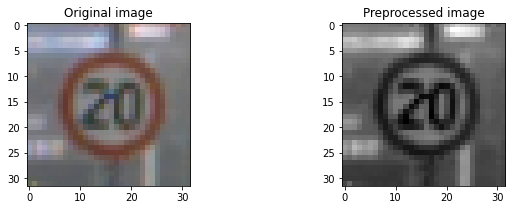

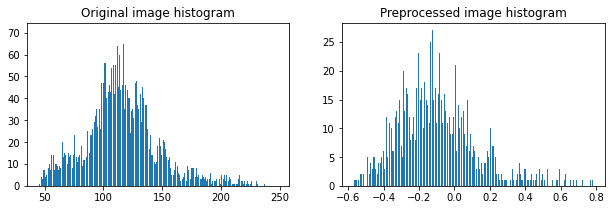

In [28]:

#import tensorflow as tf
#from tensorflow.contrib.layers import flatten
from tqdm import tqdm

def grayscale(img):    
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)[:,:,None]

def normalize(value):
    return value / 255 * 2 - 1

def preprocess_image(image):
    img = grayscale(image)
    img = normalize(img)
    return img


def preprocess_batch(images):
    imgs = np.zeros(shape=images.shape)
    processed_image_depth = preprocess_image(images[0]).shape[2]
    imgs = imgs[:,:,:,0:processed_image_depth]
    for i in tqdm(range(images.shape[0])):
        imgs[i] = preprocess_image(images[i])        
    return imgs

X_train_processed = preprocess_batch(X_train)
X_valid_processed = preprocess_batch(X_valid)
X_test_processed = preprocess_batch(X_test)

no_test_image = 10000

sample_image = X_train[no_test_image]
sample_image_processed = grayscale(X_train[no_test_image])
fig=plt.figure(figsize=(16,3))
sub=plt.subplot(131)
sub.set_title("Original image")
plt.imshow(sample_image)
sub=plt.subplot(132)
sub.set_title("Preprocessed image")
plt.imshow(sample_image_processed.squeeze(), cmap='gray')

print("Sample image dimension BEFORE processing: {}".format(sample_image.shape))
print("Sample image dimension AFTER processing: {}".format(sample_image_processed.shape))

image_depth = X_train_processed.shape[3]

sample_image = X_train[no_test_image]
dim1 = sample_image.shape[0]
dim2 = sample_image.shape[1]
dim3 = sample_image.shape[2]
sample_image_reshaped = np.reshape(sample_image, dim1*dim2*dim3)
plt.figure(figsize=(16,3))
sub=plt.subplot(131)
sub.set_title("Original image histogram")
n, bins, patches = plt.hist(sample_image_reshaped, 255)

sample_image_processed = X_train_processed[no_test_image]
dim1 = sample_image_processed.shape[0]
dim2 = sample_image_processed.shape[1]
dim3 = sample_image_processed.shape[2]
sample_image_processed_reshaped = np.reshape(sample_image_processed, dim1*dim2*dim3)
sub=plt.subplot(132)
sub.set_title("Preprocessed image histogram")
n, bins, patches = plt.hist(sample_image_processed_reshaped,255)

# Model Architecture

In [10]:
hidden_num_units = 2048
hidden_num_units1 = 1024
hidden_num_units2 = 128
output_num_units = 43

# Bayesian Optimization

In [11]:
def Black_Box(node,epochs,Drop,batch_size):
    model = keras.Sequential()

    model.add(keras.layers.Conv2D(node, (3, 3), activation='relu', input_shape=(32,32,3), padding='same'))

    model.add(keras.layers.Conv2D(node, (3, 3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
    model.add(keras.layers.Dropout(Drop))



    model.add(keras.layers.Conv2D(node, (3, 3), activation='relu', padding='same'))

    model.add(keras.layers.Conv2D(node, (3, 3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
    model.add(keras.layers.Dropout(Drop))

    model.add(keras.layers.Conv2D(node, (3, 3), activation='relu', padding='same'))

    model.add(keras.layers.Conv2D(node, (3, 3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
    model.add(keras.layers.Dropout(Drop))
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(units=hidden_num_units, activation='relu'))
    model.add(keras.layers.Dropout(Drop))

    model.add(keras.layers.Dense(units=hidden_num_units1, activation='relu'))
    model.add(keras.layers.Dropout(Drop))

    model.add(keras.layers.Dense(units=hidden_num_units2, activation='relu'))
    model.add(keras.layers.Dropout(Drop))

    model.add(keras.layers.Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'))
    
    
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=1e-4), metrics=['accuracy'])
    trained_model_conv = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid),verbose=1)
    
    
    number_of_equal_elements = np.sum(y_train==model.predict(X_train).round())
    total_elements = np.multiply(*y_train.shape)
    percentage = number_of_equal_elements/total_elements
    return percentage


In [16]:
bounds={'node':(16,128),
        'epochs': (10,30),
         'Drop':(0.2,0.4),
         'batch_size':(100,400)
       }

In [18]:
optimizer = BayesianOptimization(
    f=Black_Box,
    pbounds=bounds,
    random_state=1
)

optimizer.maximize(n_iter=50)

|   iter    |  target   |   Drop    | batch_... |  epochs   |   node    |
-------------------------------------------------------------------------


TypeError: Dimension value must be integer or None or have an __index__ method, got 49.86124813476606

In [17]:
# epochs = 20
# batch_size = 200
# pool_size = (2,2)
# #list_images /= 255.0
# input_shape = Input(shape=(32, 32,3))

In [18]:
# model = keras.Sequential()

# model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3), padding='same'))

# model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
# model.add(keras.layers.Dropout(0.25))
          

          
# model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

# model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
# model.add(keras.layers.Dropout(0.2))
    
# model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))

# model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Flatten())
          
# model.add(keras.layers.Dense(units=hidden_num_units, activation='relu'))
# model.add(keras.layers.Dropout(0.2))
          
# model.add(keras.layers.Dense(units=hidden_num_units1, activation='relu'))
# model.add(keras.layers.Dropout(0.3))
          
# model.add(keras.layers.Dense(units=hidden_num_units2, activation='relu'))
# model.add(keras.layers.Dropout(0.3))
          
# model.add(keras.layers.Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'))


In [19]:
# model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])
# trained_model_conv = model.fit(train_x.reshape(-1,64,64,3), train1_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

In [21]:
# model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=1e-4), metrics=['accuracy'])
# trained_model_conv = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid),verbose=1)

# Plot of the learning history of the trained CNN model 

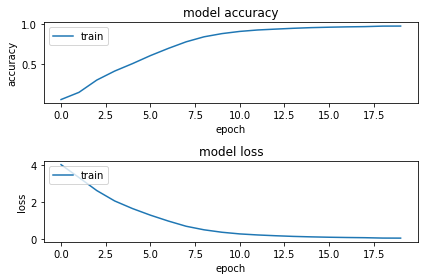

In [26]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(trained_model_conv.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(trained_model_conv.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()


In [30]:
score=model.evaluate(X_test, y_test)
print('loss:', score[0])
print('accuracy:', score[1])


12630/12630 [==============================] - 6s 466us/sample - loss: 0.2181 - acc: 0.9473
loss: 0.21808474943774028
accuracy: 0.9473476


# Useful Articles
- https://github.com/tomaszkacmajor/CarND-Traffic-Sign-Classifier-P2/blob/master/Traffic_Sign_Classifier.ipynb
- https://medium.com/typeiqs/traffic-sign-recognition-aa38d699ac9 
- https://medium.com/@sdoshi579/convolutional-neural-network-learn-and-apply-3dac9acfe2b6
- https://towardsdatascience.com/traffic-sign-detection-using-convolutional-neural-network-660fb32fe90e    
    